## Содержание
- [Введение](#intro)
    - [Тарифы](#rates)
- [Импортирование необходимых данных](#import)
- [Изучение данных](#analysis)
    - [Изучим типы и наличие пропусков с данных](#types_and_null_values)
    - [Изменим типы](#change_type)
    - [Заполним пропуски](#fillna)
- [Сбор статистики](#get_stat)
- [Анализ собраных данных](#analysis_stat)
    - [Графики](#graph)
- [Проверка гипотез](#hypothesis)
    - [Первая гипотеза](#first_hypothesis)
    - [Вторая гипотеза](#second_hypothesis)
- [Вывод](#Summary)

## <a class="anchor" id='intro'></a>Введение 

Заказчик — коммерческий департамент компании «Мегалайн». Исследование направленное на определение тарифа, сильнее всего влияющего на доход компании. Сравнение будет проводиться между тарифами «Смарт» и «Ультра». Результат исследования будет использоваться для корректирования рекламного бюджета.

<html>
    <body>
        <div class="anchor" id = 'rates'>
            <h2 style = "text-align: center;padding-bottom: 20px;">Тарифы</h2>
            <div style="float:left;width: 49%;"> 
                <h3>Тариф «Смарт»</h3>
                <ol>
                    <li>Ежемесячная плата: 550 рублей</li>
                    <li>В тариф включено:</li>
                    <ul>
                        <li>500 минут разговора</li>
                        <li>50 сообщений</li>
                        <li>15 Гб интернет-трафика</li>
                    </ul>
                    <li>Стоимость услуг сверх тарифного пакета:</li>
                    <ul>
                        <li>минута разговора: 3 рубля</li>
                        <li>сообщение: 3 рубля</li>
                        <li>1 Гб интернет-трафика: 200 рублей</li>
                    </ul>
                </ol>
            </div>
            <div style = "margin-left: 55%;"> 
                <h3>Тариф «Ультра»</h3>
                <ol>
                    <li>Ежемесячная плата: 1950 рублей</li>
                    <li>В тариф включено: </li>
                    <ul>
                        <li>3000 минут разговора</li>
                        <li>1000 сообщений</li>
                        <li>30 Гб интернет-трафика</li>
                    </ul>
                    <li>Стоимость услуг сверх тарифного пакета:</li>
                    <ul>
                        <li>минута разговора: 1 рубль</li>
                        <li>сообщение: 1 рубль</li>
                        <li>1 Гб интернет-трафика: 150 рублей</li>
                    </ul>
                </ol>
            </div>
        </div>
    </body>
</html>

## Импортирование необходимых данных
<a class="anchor" id = 'import'></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv').drop(['Unnamed: 0'],axis = 1)
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

## Изучение данных
<a class="anchor" id = 'analysis'></a>

### Изучим типы и наличие пропусков с данных
<a class="anchor" id = 'types_and_null_values'></a>

In [2]:
#Создадим словарь соответствия фрейма и его имени
dictionary_with_frames ={
    'calls': calls,
    'internet': internet,
    'messages': messages,
    'tariffs': tariffs,
    'users': users 
}

Для того что бы не вызывать метод info() для каждого фрейма, создадим функцию агрегирующую необходимую информацию в одну таблицу

In [3]:
def get_stat(dict_of_frames):
    """Функция для агрегации данных о нескольких загруженных таблицах.
    Собирает следующею информацию: количесво объектов(строк) в данных,
    количесвто null-значений и тип каждого столбца
    """
    def table(dataframe, name):
        """Функция отвечающая за создание промежуточных таблиц,
        собирая данные из конкретного переданного фрейма
        """
        columns = dataframe.columns
        count_of_rows = len(columns)
        total = dataframe.shape[0]
        
        part_total_table = pd.DataFrame(data =[[0] * 5] * count_of_rows, 
                                        columns = ['total',
                                                   'frame',
                                                   "columns",
                                                   "null_values",
                                                   "type"])
    
        part_total_table['total'] = [total] * count_of_rows
        part_total_table['frame'] = [name] * count_of_rows
        part_total_table['columns'] = columns
        
        for column in columns:
            curent_type = str(dataframe[column].dtype)
            count_of_null = dataframe[column].isnull().sum()
            part_total_table.loc[part_total_table['columns'] == column,'null_values'] = count_of_null
            part_total_table.loc[part_total_table['columns'] == column,'type'] = curent_type
        return part_total_table
        
    final_frame = pd.DataFrame(columns = ['total','frame',"columns","null_values","type"])
    
    for name,frame in dict_of_frames.items():
        part_of_table = table(frame,name)
        final_frame = final_frame.append(part_of_table)
        
    final_frame = final_frame.reset_index(drop = True)
    final_frame_grouped = final_frame.groupby(['total','frame',"columns"]).sum()
    
    return final_frame_grouped

In [4]:
get_stat(dictionary_with_frames)

null_values     type
total  frame    columns                                    
2      tariffs  mb_per_month_included            0    int64
                messages_included                0    int64
                minutes_included                 0    int64
                rub_monthly_fee                  0    int64
                rub_per_gb                       0    int64
                rub_per_message                  0    int64
                rub_per_minute                   0    int64
                tariff_name                      0   object
500    users    age                              0    int64
                churn_date                     462   object
                city                             0   object
                first_name                       0   object
                last_name                        0   object
                reg_date                         0   object
                tariff                           0   object
                user_id                          0    int64
123036 messages id                               0   object
                message_date                     0   object
                user_id                          0    int64
149396 internet id                               0   object
                mb_used                          0  float64
                session_date                     0   object
                user_id                          0    int64
202607 calls    call_date                        0   object
                duration                         0  float64
                id                               0   object
                user_id                          0    int64

### Изменим типы <a class="anchor" id = 'change_type'></a>

Заметим, что в данных присутсвуют пропуски в таблице users столбец churn_date содержит 462 пропущенных значений, которые нужно заменить на значение означающее, что тариф ативен.
Необходимо изменить тип у следующих столбцов:
1. users
     1. churn_date на datetime
     1. reg_date на datetime
1. messages
    1. message_date на datetime
1. internet
    1. session_date на datetime
1. calls
    1. call_date на datetime

Приведем необходимые столбцы к типу datetime

In [5]:
columns_to_datetime = {"reg_date":users,
                       "message_date":messages,
                       "session_date":internet,
                       "call_date":calls}

for column, frame in columns_to_datetime.items():
    frame[column] = pd.to_datetime(frame[column],format = '%Y-%m-%d')

Пропуски в таблице users столбец churn_date заполним по принципу, что основном люди не живут дольше 100 лет, следовательно в этом возрасте человек точно прекратит пользоваться услугами компании.Прибавим к текущей дате разницу между 100 и возрастом абонента и заполним этим значением пропуски

### Заполним пропуски <a class="anchor" id = 'fillna'></a>

In [6]:
def fillna_churn_date(row):
    """Функция для генерации значений необходимых для
    заполнения пропушенных данных в столбце churn_date
    """
    if pd.isnull(row["churn_date"]):
        MAX_YEARS = 100
        delta = MAX_YEARS - row['age'] 
        date = str(2020 + delta)+'-08-26'
        row["churn_date"] = pd.to_datetime(date,format = '%Y-%m-%d')
    return row

In [7]:
users = users.apply(fillna_churn_date, axis = 1)

Все ошибки по значениям исправлены

## Сбор статистики <a class="anchor" id = 'get_stat'></a>

Создадим столбцы хранящие в себе значение месяцев, когда произошло событие

In [8]:
calls['month'] = calls["call_date"].dt.month

In [9]:
messages['month'] = messages["message_date"].dt.month

In [10]:
internet['month'] = internet['session_date'].dt.month

Соберем статистику по предоставленным данным для дальнейшего анализа 

In [11]:
statistic_frame = pd.DataFrame(columns= ['user_id',
                                    "month",
                                    "count_calls",
                                    'calls_total_duration',
                                    'count_messages',
                                    'total_mb_used'
                                   ])
for idx in users['user_id']:
    for month_x in range(1,13):
        if ((month_x in calls.query('user_id == @idx')['month'].to_numpy()) or
            (month_x in messages.query('user_id == @idx')['month'].to_numpy())):
            
            count_calls = calls.query('user_id == @idx and month == @month_x').shape[0]
            total_duration_calls = calls.query('user_id == @idx and month == @month_x')['duration'].sum()
            count_messages = messages.query('user_id == @idx and month == @month_x').shape[0]
            total_used = internet.query('user_id == @idx and month == @month_x')['mb_used'].sum()
            
            statistic_frame = statistic_frame.append({'user_id':idx,
                               'month':month_x,             
                               "count_calls":count_calls,
                               'calls_total_duration':total_duration_calls,
                               'count_messages':count_messages,
                               'total_mb_used':total_used             
                                           }, ignore_index=True)

In [12]:
statistic_frame['user_id'] = statistic_frame['user_id'].astype('int')

Добавим в таблицу значение тарифа и города

In [13]:
statistic_frame = statistic_frame.merge(users[['user_id','tariff']], on = 'user_id')
statistic_frame = statistic_frame.merge(users[['user_id','city']], on = 'user_id')

In [14]:
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city
0,1000,5.0,22.0,150.06,22.0,2253.49,ultra,Краснодар
1,1000,6.0,43.0,158.90,60.0,23233.77,ultra,Краснодар
2,1000,7.0,47.0,318.80,75.0,14003.64,ultra,Краснодар
3,1000,8.0,52.0,389.87,81.0,14055.93,ultra,Краснодар
4,1000,9.0,58.0,440.14,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3208,1498,10.0,41.0,232.63,42.0,20579.36,smart,Владикавказ
3209,1499,9.0,9.0,64.65,11.0,1845.75,smart,Пермь
3210,1499,10.0,68.0,429.91,48.0,17788.51,smart,Пермь
3211,1499,11.0,74.0,576.50,59.0,17963.31,smart,Пермь


In [15]:
def get_income(row):
    """Функция высчитываяющая доход копании с конкретного абонента
    """
    def get_extra(dict_of_param):
        """ Функция вычисляющая минуты, потраченные абонентом сверх
        базового пакета
        """
        local_extra_min = 0
        local_extra_sms = 0
        local_extra_gb = 0
        if row['calls_total_duration'] > dict_of_param['calls_total_duration']: 
            local_extra_min = row['calls_total_duration'] - dict_of_param['calls_total_duration']
        if row['count_messages'] > dict_of_param['count_messages']:
            local_extra_sms = row['count_messages'] - dict_of_param['count_messages']
        if row['total_mb_used'] > dict_of_param['total_mb_used']:
            local_extra_gb = (row['total_mb_used'] - dict_of_param['total_mb_used'])/1024
        return local_extra_min, local_extra_sms, local_extra_gb   
    
    ultra_param = {
        'calls_total_duration':3000,
        'count_messages': 1000,
        'total_mb_used': 30 * 1024
    }
    smart_param = {
        'calls_total_duration':500,
        'count_messages': 50,
        'total_mb_used': 15 * 1024
    }
            
    if row['tariff'] == 'ultra':
        income = 1950
        extra_min, extra_sms, extra_gb = get_extra(ultra_param)
        income += extra_min + extra_sms + extra_gb * 150     
    elif row['tariff'] == 'smart':
        income = 550
        extra_min, extra_sms, extra_gb = get_extra(smart_param)
        income += 3 * extra_min + 3* extra_sms + extra_gb * 200 
    return income

In [16]:
statistic_frame['income'] = statistic_frame.apply(get_income, axis = 1)

In [17]:
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city,income
0,1000,5.0,22.0,150.06,22.0,2253.49,ultra,Краснодар,1950.000000
1,1000,6.0,43.0,158.90,60.0,23233.77,ultra,Краснодар,1950.000000
2,1000,7.0,47.0,318.80,75.0,14003.64,ultra,Краснодар,1950.000000
3,1000,8.0,52.0,389.87,81.0,14055.93,ultra,Краснодар,1950.000000
4,1000,9.0,58.0,440.14,57.0,14568.91,ultra,Краснодар,1950.000000
...,...,...,...,...,...,...,...,...,...
3208,1498,10.0,41.0,232.63,42.0,20579.36,smart,Владикавказ,1569.406250
3209,1499,9.0,9.0,64.65,11.0,1845.75,smart,Пермь,550.000000
3210,1499,10.0,68.0,429.91,48.0,17788.51,smart,Пермь,1024.318359
3211,1499,11.0,74.0,576.50,59.0,17963.31,smart,Пермь,1314.958984


## Анализ собраных данных  <a class="anchor" id = 'analysis_stat'></a>

In [18]:
statistic_frame.pivot_table(index = 'tariff', values = ['calls_total_duration',
                                                        'count_messages',
                                                        'total_mb_used','income'], aggfunc = ["median",
                                                                                     "mean",
                                                                                     'var',
                                                                                     'std'])

median                                            \
       calls_total_duration count_messages       income total_mb_used   
tariff                                                                  
smart                397.98           28.0   925.582031      16506.84   
ultra                488.28           38.0  1950.000000      19311.93   

                       mean                                            \
       calls_total_duration count_messages       income total_mb_used   
tariff                                                                  
smart            394.427026      33.384029  1197.628537  16208.386990   
ultra            497.573374      49.413618  2059.980573  19488.051169   

                        var                                              \
       calls_total_duration count_messages         income total_mb_used   
tariff                                                                    
smart          32386.395979     796.812958  589227.600734  3.446250e+07   
ultra          89782.393134    2285.109519  126056.200780  1.014893e+08   

                        std                                           
       calls_total_duration count_messages      income total_mb_used  
tariff                                                                
smart            179.962207      28.227876  767.611621   5870.476681  
ultra            299.637102      47.802819  355.043942  10074.189914

### Графики <a class="anchor" id = 'graph'></a>

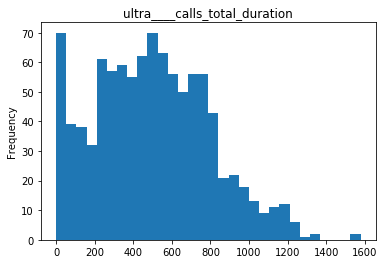

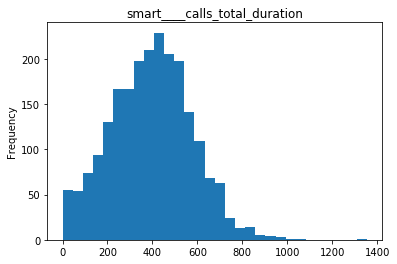

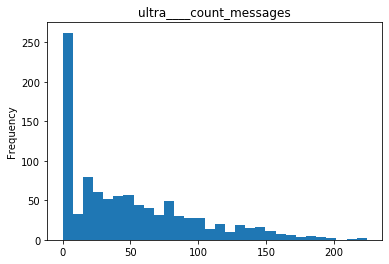

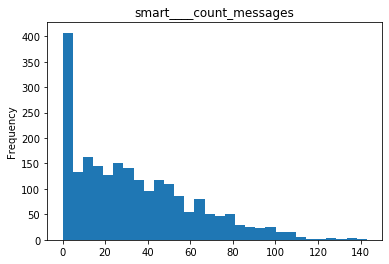

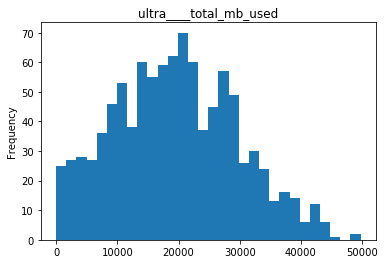

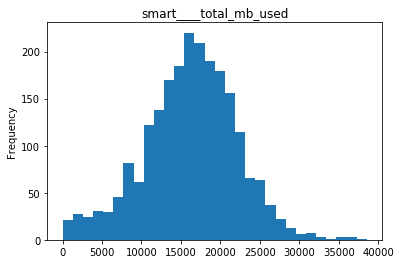

In [19]:
list_of_columns=['calls_total_duration','count_messages','total_mb_used']
tariffs = ['ultra','smart']
for column in list_of_columns:
    for tariff in tariffs:
        statistic_frame.loc[statistic_frame.loc[:,'tariff'] == tariff][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                           )
        plt.title(str(tariff+'____'+column) )
        plt.show()

На гистограмах можно заметить что,у тарифа ultra гистрограмы скошены вправо, а в тарифе smart гистограмы скошены влево. Это так же подтверждают данные медианы и среднего, приведенные в сводной таблице. Кроме этого можно заметить, что пользователи тарифа ultra не тратят весь базовый пакет минут и количесва смс, в отличие от тарифа smart

## Проверка гипотез  <a class="anchor" id = 'hypothesis'></a>

### Первая гипотеза <a class="anchor" id = 'first_hypothesis'></a>

Гипотеза 1 : средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Если мы проверим обратную гипотезу на равенство и она не подтвердиться, то мы сможем сказать, что гипотеза 1 верна

In [20]:
alpha = 0.05
income_ultra = statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'ultra']['income']
income_smart = statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['income']
result = st.ttest_ind(income_smart,income_ultra,equal_var=False) 
prob = result.pvalue
if prob < alpha:
    print("Отвергаем альтернативную гипотезу")
else:
    print("Не получилось альтернативную гипотезу")
    

Отвергаем альтернативную гипотезу


проверка показала, что мы отвергаем гипотезу о том, что среднее значение дохода абонентов 2 тарифов равны, слеовательно подтверждаем гипотезу 1

### Вторая гипотеза  <a class="anchor" id = 'second_hypothesis'></a>

Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [21]:
alpha = 0.05
income_ultra = statistic_frame.loc[statistic_frame.loc[:,'city'] == 'Moscow']['income']
income_smart = statistic_frame.loc[statistic_frame.loc[:,'city'] != 'Moscow']['income']
result = st.ttest_ind(income_smart,income_ultra,equal_var=False) 
prob = result.pvalue
if prob < alpha:
    print("Отвергаем гипотезу 2")
else:
    print("Не получилось отвергнуть гипотезу 2")

Не получилось отвергнуть гипотезу 2


## Вывод <a class="anchor" id = 'Summary'></a>

Рекламный бюджет выгоднее всего преераспределить в пользу тарифа ultra, несмотря на то, что его абоненты не покупают дополнительные минуты и смс, в отличие от абонентов тарифа smart. Так же можно заметить, что мидианное и среднее значение дохода у абонентов тарифа ultra выше.